In [34]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data={
'feature1' : [np.nan, 3, 6, 9, 12, 15, np.nan],
'feature2' : [100, np.nan, 200, 300, np.nan, np.nan, 600],
'feature3' : [1000, 500, 2000, 3000, 4000, 6000, 8000]

})

In [35]:
df.isnull
df.isnull().sum()
df.fillna(method='pad', limit=1)
df.fillna(method='bfill')
df.dropna(axis=0)
df['feature1'].fillna(df['feature1'].mean())
df['feature2'].interpolate()


C:\Users\Dimas Fajar\AppData\Local\Temp\ipykernel_5424\1442071374.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad', limit=1)
C:\Users\Dimas Fajar\AppData\Local\Temp\ipykernel_5424\1442071374.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


0    100.0
1    150.0
2    200.0
3    300.0
4    400.0
5    500.0
6    600.0
Name: feature2, dtype: float64

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv")

<Axes: ylabel='Frequency'>

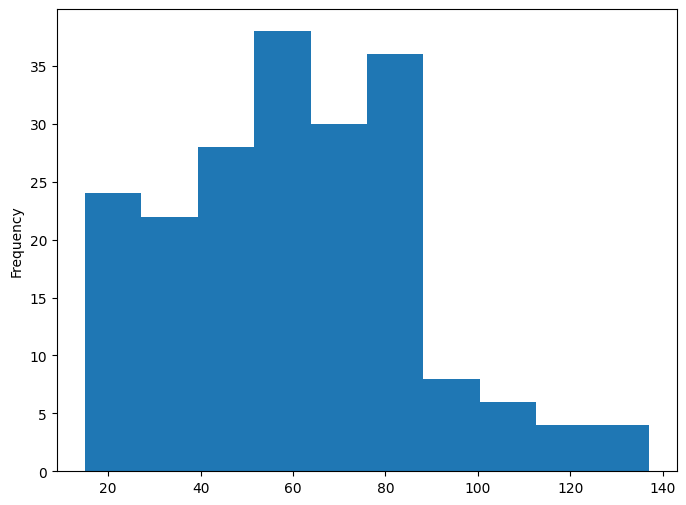

In [37]:
df.isnull().any()
df["Annual Income (k$)"].plot.hist(bins=10, figsize=(8,6))

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

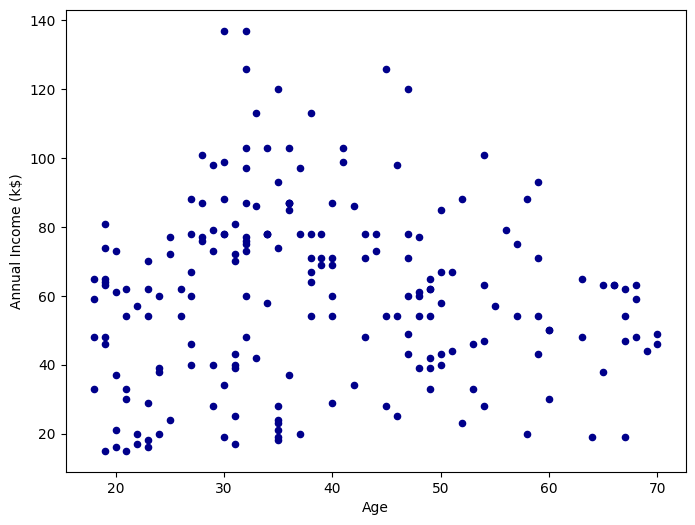

In [38]:
df.plot.scatter(x="Age", y="Annual Income (k$)", c="DarkBlue", figsize=(8,6))

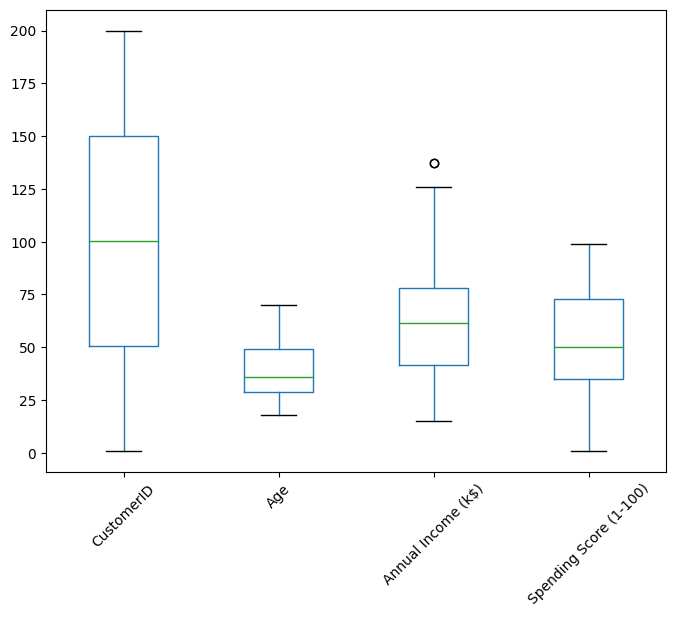

In [39]:
boxplot = df.boxplot(grid=False, rot=45, figsize=(8,6))

In [40]:
Q1 = df["Annual Income (k$)"].quantile(0.25)
Q3 = df["Annual Income (k$)"].quantile(0.75)

IQR = Q3 - Q1
cutoff = Q1 + 1.5 * IQR

df["Anual_Income_Outlier"] = False

for index, row in df.iterrows():
    if row["Annual Income (k$)"] > cutoff:
        df.at[index, 'Anual_Income_Outlier'] = True


In [41]:
mean = df.groupby("Anual_Income_Outlier")["Annual Income (k$)"].mean()
mean[0]

C:\Users\Dimas Fajar\AppData\Local\Temp\ipykernel_5424\1109530169.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean[0]


55.1

In [42]:
for index, row in df.iterrows():
    if row["Anual_Income_Outlier"] == True:
        df.at[index, 'Annual Income (k$)'] = mean[0]

C:\Users\Dimas Fajar\AppData\Local\Temp\ipykernel_5424\1123344253.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.at[index, 'Annual Income (k$)'] = mean[0]
C:\Users\Dimas Fajar\AppData\Local\Temp\ipykernel_5424\1123344253.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '55.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'Annual Income (k$)'] = mean[0]


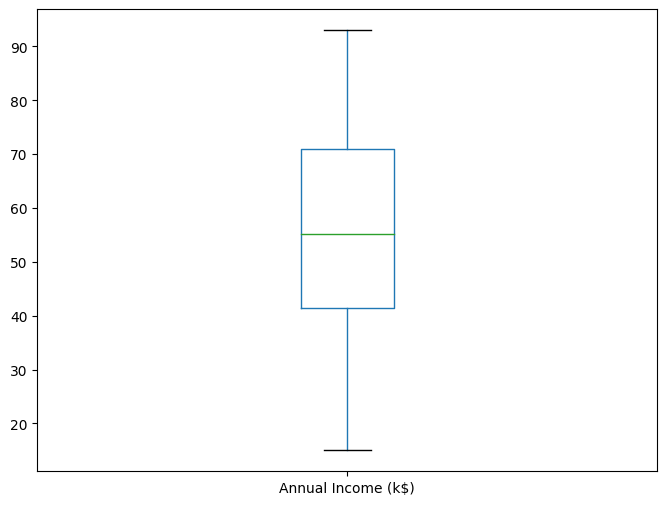

In [43]:
boxplot = df.boxplot(grid=False, column=["Annual Income (k$)"], figsize=(8,6))

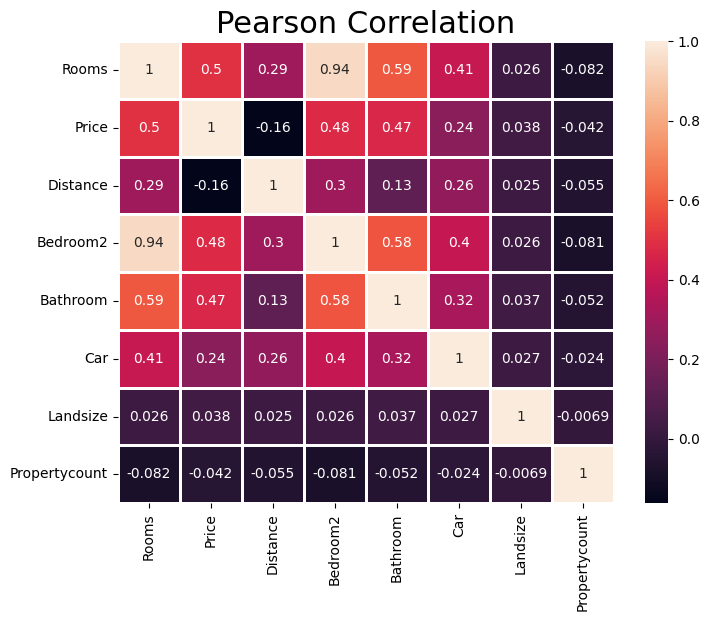

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('melb_data_processed.csv')

df = df.drop(['Lattitude', 'Longtitude', 'Postcode'], axis=1)

num_type = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_col = list(df.select_dtypes(include=num_type).columns)
df_num = df[num_col]

pearson_corr = df_num.corr(method='pearson')

plt.figure(figsize=(8, 6))

sns.heatmap(pearson_corr, linewidths=1, annot=True, annot_kws={'size': 10})

plt.title('Pearson Correlation', fontsize=22)

plt.show()
